In [5]:
# Load required Python libraries

%matplotlib inline
import glob
import os
import shutil
import time
from pathlib import Path

import cv2
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from IPython import display

In [6]:
# Input images
image_file_pattern = "./aruco_measurement_images/Tag_0/unlabeled/*.JPG"  # Wildcard symbol (*) will select all files given the specific pattern
input_images = sorted(glob.glob(image_file_pattern))  # Sorted image list

# Ouput directory
output_dir = "./aruco_measurement_images/Tag_0/labeled/"  # Directory where renamed images will be copied to

# Creates output directory if it does not exist
if os.path.isdir(output_dir) == False:
    os.makedirs(output_dir)

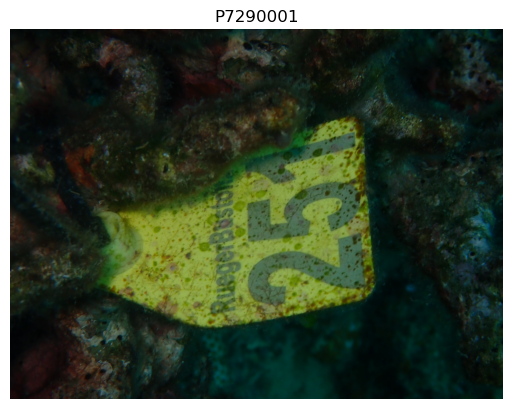

KeyboardInterrupt: Interrupted by user

In [7]:
# Create blank placeholder variables
prev_tag = None
prev_rank = None
prev_save = 0
save = None
tag = None
rank = None

start_file = 0  # Define starting file if you do not want to start from the first file in the image list

for idx, image in enumerate(input_images[start_file:]):
    img = cv2.imread(image)  # Read in image
    RGB_img = cv2.cvtColor(
        img, cv2.COLOR_BGR2RGB
    )  # Convert image from BGR to RGB color space
    plt.imshow(RGB_img)  # Show image

    # Plot image
    plt.title(Path(image).stem)
    plt.ion()  # Turn the interactive mode on.
    plt.axis("off")
    plt.pause(0.001)  # Pause for interval seconds.
    plt.close()

    # Request user input
    tag = input("Tag: [{}]".format(prev_tag))
    rank = input("Rank: [{}]".format(prev_rank))
    save = input("Save? [{}]".format(prev_save))

    # Keep or change variables according to user input
    if (tag == None) or (tag == ""):
        tag = prev_tag
    elif tag == prev_tag:
        continue
    if (rank == None) or (rank == ""):
        rank = prev_rank
    elif rank == prev_rank:
        continue
    if (save == None) or (save == ""):
        save = int(prev_save)
    else:
        save = int(save)

    prev_tag = tag
    prev_rank = rank
    prev_save = save

    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.close()

    # Copy files
    if save == 1:
        dirname = os.path.basename(
            os.path.dirname(image)
        )  # Name of directory in which input images are located
        dst = (
            output_dir
            + "RB{}".format(tag)
            + "_"
            + dirname
            + "_"
            + "Rank{}".format(rank)
            + "_"
            + Path(image).stem
            + "_"
            + str(idx).zfill(5)
            + Path(image).suffix
        )  # Creat output file name

        src = image  # Source image to copy to output file name
        print(src, dst)  # Show input and output file names
        shutil.copy(src, dst)  # Copy input to output file destination